In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# load MNIST Data
from sklearn.datasets import load_digits
digits = load_digits()
# data = digits['data']/255
# target = digits['target']
# target_labels = digits['target_names']

digits.data.shape
# digits

(1797, 64)

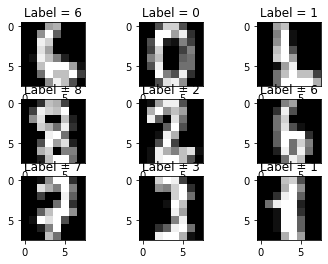

In [10]:
ncols, nrows = 3, 3
fig, ax = plt.subplots(ncols=ncols, nrows=nrows)

for k in range(ncols*nrows):
    i = k//nrows
    j = k - i*nrows
    idx = np.random.randint(1797)
    ax[i][j].imshow(digits.images[idx], cmap='gray')
    ax[i][j].set_title("Label = {}".format(digits.target[idx]))

In [15]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from torch import nn

In [19]:
X_train, X_test, y_train, y_test = train_test_split(digits.data/255, digits.target, test_size=0.25, stratify=digits.target)

train_ds = TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
test_ds = TensorDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())
batch_size = 50
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [18]:
class MnistModel(nn.Module):
    def __init__(self, input_size, target_size):
        super().__init__()
        self.linear = nn.Linear(input_size, target_size)
    
    def forward(X):
        return nn.linear(X)
    
    def train(X_train, y_train):
        pass